Epoch 0: 18.894394092953082
Epoch 1: 10.342727648614716
Epoch 2: 6.204996533110669
Epoch 3: 4.599169356176582
Epoch 4: 4.099888914060759
Epoch 5: 3.963753025232917
Epoch 6: 3.9226913308421083
Epoch 7: 3.904443438182482
Epoch 8: 3.8919744213427414
Epoch 9: 3.8811230052893526
Epoch 10: 3.8707344940294677
Epoch 11: 3.860463025474394
Epoch 12: 3.850201823872077
Epoch 13: 3.839928731835506
Epoch 14: 3.8296430313342538
Epoch 15: 3.81935482539829
Epoch 16: 3.8090701666118285
Epoch 17: 3.798796582397399
Epoch 18: 3.7885359197342643
Epoch 19: 3.7782930067978198
Epoch 20: 3.7680684906588833
Epoch 21: 3.757865152331076
Epoch 22: 3.7476853676583315
Epoch 23: 3.737526094179509
Epoch 24: 3.7273902631646694
Epoch 25: 3.71727841454481
Epoch 26: 3.7071897393171267
Epoch 27: 3.6971242918602565
Epoch 28: 3.687083074807361
Epoch 29: 3.677063685764955
Epoch 30: 3.6670699832353573
Epoch 31: 3.657099678025364
Epoch 32: 3.6471526776079135
Epoch 33: 3.637230173527741
Epoch 34: 3.627330499417515
Epoch 35: 3.617

Epoch 282: 1.865949089526888
Epoch 283: 1.8614178824715435
Epoch 284: 1.8569048981360348
Epoch 285: 1.852410156292479
Epoch 286: 1.8479327235071488
Epoch 287: 1.8434746627122318
Epoch 288: 1.8390348389721884
Epoch 289: 1.8346141780492702
Epoch 290: 1.8302098816750534
Epoch 291: 1.8258245332348588
Epoch 292: 1.8214559471947178
Epoch 293: 1.8171060304880624
Epoch 294: 1.8127731354747314
Epoch 295: 1.8084589109650755
Epoch 296: 1.8041626618634845
Epoch 297: 1.7998841559765524
Epoch 298: 1.795623695379388
Epoch 299: 1.7913802965337555
Epoch 300: 1.7871544934656072
Epoch 301: 1.7829466800127836
Epoch 302: 1.7787562497259786
Epoch 303: 1.7745837022862736
Epoch 304: 1.7704292667576227
Epoch 305: 1.7662918766683748
Epoch 306: 1.7621726465859096
Epoch 307: 1.758070399048522
Epoch 308: 1.7539845080082745
Epoch 309: 1.7499172079678196
Epoch 310: 1.745866904857973
Epoch 311: 1.7418345906356352
Epoch 312: 1.7378189016503336
Epoch 313: 1.7338212561912254
Epoch 314: 1.729838282395483
Epoch 315: 1.725

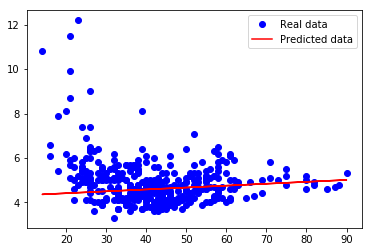

In [2]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = 'measurements2.xlsx'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
	
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
    for i in range(1000): # train the model 500 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        if(total_loss/n_samples) < 1.2 :
            break;
      
	# close the writer when you're done using it
    writer.close() 
	
	# Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

Epoch 0: 8.185162730603805
Epoch 1: 3.879255312603792
Epoch 2: 3.8398212245844645
Epoch 3: 3.805367483729066
Epoch 4: 3.771205466564059
Epoch 5: 3.737298101006492
Epoch 6: 3.703644606481009
Epoch 7: 3.670245397553887
Epoch 8: 3.6370992126523247
Epoch 9: 3.6042054480994192
Epoch 10: 3.571564266031713
Epoch 11: 3.5391754027181044
Epoch 12: 3.507037797064603
Epoch 13: 3.475151253938439
Epoch 14: 3.443515601417342
Epoch 15: 3.4121300501305534
Epoch 16: 3.38099461776546
Epoch 17: 3.3501084797319223
Epoch 18: 3.31947128675917
Epoch 19: 3.289082211224459
Epoch 20: 3.2589416559667566
Epoch 21: 3.2290489510047222
Epoch 22: 3.199403383007857
Epoch 23: 3.170004167465632
Epoch 24: 3.1408517533954647
Epoch 25: 3.111943484261694
Epoch 26: 3.083280545650144
Epoch 27: 3.0548624673816147
Epoch 28: 3.026688035146707
Epoch 29: 2.9987562477776932
Epoch 30: 2.9710695864293353
Epoch 31: 2.943624460344442
Epoch 32: 2.9164214033191698
Epoch 33: 2.8894591089846844
Epoch 34: 2.8627378426071464
Epoch 35: 2.83625

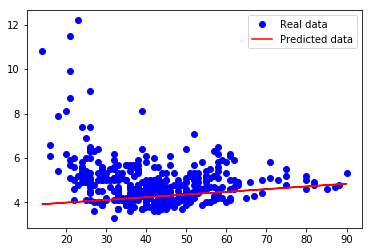

In [3]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = 'measurements2.xlsx'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.101 to minimize loss
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.0005).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
	
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
    for i in range(1000): # train the model 500 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        if(total_loss/n_samples) < 1.3 :
            break;
      
	# close the writer when you're done using it
    writer.close() 
	
	# Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()